In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [223]:
weather = pd.read_csv("NOAA_weather.csv", index_col="DATE")

In [224]:
weather.groupby(by="NAME").describe(include=[np.number])

LATITUDE            \
                                                 count      mean   
NAME                                                               
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  10841.0  30.18311   
CHICAGO MIDWAY AIRPORT, IL US                   9807.0  41.78412   
DENVER INTERNATIONAL AIRPORT, CO US            10624.0  39.84657   
MIAMI OPA LOCKA AIRPORT, FL US                  9421.0  25.91017   
NY CITY CENTRAL PARK, NY US                    16143.0  40.77898   

                                                                       \
                                                        std       min   
NAME                                                                    
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  3.552878e-15  30.18311   
CHICAGO MIDWAY AIRPORT, IL US                  1.421158e-14  41.78412   
DENVER INTERNATIONAL AIRPORT, CO US            0.000000e+00  39.84657   
MIAMI OPA LOCKA AIRPORT, FL US                 3.552902e-15  25.91017   
NY CITY CENTRAL PARK, NY US                    7.105647e-15  40.77898   

                                                                             \
                                                    25%       50%       75%   
NAME                                                                          
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  30.18311  30.18311  30.18311   
CHICAGO MIDWAY AIRPORT, IL US                  41.78412  41.78412  41.78412   
DENVER INTERNATIONAL AIRPORT, CO US            39.84657  39.84657  39.84657   
MIAMI OPA LOCKA AIRPORT, FL US                 25.91017  25.91017  25.91017   
NY CITY CENTRAL PARK, NY US                    40.77898  40.77898  40.77898   

                                                        LONGITUDE             \
                                                    max     count       mean   
NAME                                                                           
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  30.18311   10841.0  -97.67989   
CHICAGO MIDWAY AIRPORT, IL US                  41.78412    9807.0  -87.75514   
DENVER INTERNATIONAL AIRPORT, CO US            39.84657   10624.0 -104.65623   
MIAMI OPA LOCKA AIRPORT, FL US                 25.91017    9421.0  -80.28283   
NY CITY CENTRAL PARK, NY US                    40.77898   16143.0  -73.96925   

                                               ...  WSFG         WSFM  \
                                               ...   75%   max  count   
NAME                                           ...                      
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  ...   NaN   NaN    0.0   
CHICAGO MIDWAY AIRPORT, IL US                  ...   NaN   NaN    0.0   
DENVER INTERNATIONAL AIRPORT, CO US            ...   NaN   NaN    0.0   
MIAMI OPA LOCKA AIRPORT, FL US                 ...   NaN   NaN    0.0   
NY CITY CENTRAL PARK, NY US                    ...  25.3  64.4  683.0   

                                                                               \
                                                    mean       std  min   25%   
NAME                                                                            
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US        NaN       NaN  NaN   NaN   
CHICAGO MIDWAY AIRPORT, IL US                        NaN       NaN  NaN   NaN   
DENVER INTERNATIONAL AIRPORT, CO US                  NaN       NaN  NaN   NaN   
MIAMI OPA LOCKA AIRPORT, FL US                       NaN       NaN  NaN   NaN   
NY CITY CENTRAL PARK, NY US                    21.795608  7.220375  6.9  16.1   

                                                                 
                                                50%   75%   max  
NAME                                                             
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US   NaN   NaN   NaN  
CHICAGO MIDWAY AIRPORT, IL US                   NaN   NaN   NaN  
DENVER INTERNATIONAL AIRPORT, CO US             NaN   NaN   NaN  
MIAMI OPA LO

In [225]:
stations = [x for _, x in weather.groupby("NAME")]
station_names = [df["NAME"][0] for df in stations]
states = set(["TX", "IL", "FL", "NY", "CO"])
station_names = list(map(lambda s: " ".join(map(lambda w: w.capitalize() if w not in states else w, s.split(" ")))[:-3], station_names))
station_names


/tmp/ipykernel_264/3189744134.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  station_names = [df["NAME"][0] for df in stations]


['Austin Bergstrom International Airport, TX',
 'Chicago Midway Airport, IL',
 'Denver International Airport, CO',
 'Miami Opa Locka Airport, FL',
 'NY City Central Park, NY']

In [226]:
# Percent null per column
round(weather.apply(pd.isnull).sum()/weather.shape[0]*100, 2)

STATION        0.00
NAME           0.00
LATITUDE       0.00
LONGITUDE      0.00
ELEVATION      0.00
ACMH         100.00
AWND          13.89
FMTM          53.02
PGTM          43.77
PRCP           1.60
PSUN          97.35
SNOW          34.60
SNWD          34.78
TAVG          63.11
TMAX           0.88
TMIN           0.95
TSUN          79.32
WDF1          92.36
WDF2          14.30
WDF5          14.48
WDFG          92.33
WDFM          98.80
WESD          99.99
WSF1          92.36
WSF2          14.30
WSF5          14.40
WSFG          92.29
WSFM          98.80
dtype: float64

In [227]:
processed = []
for d in stations:
    columns = ['PRCP', 'TMAX', 'TMIN'] # non-null numeric cols only
    df = d[columns].copy()          
    df.index = pd.to_datetime(df.index)
    df["target"] = df.shift(-1)["TMAX"]     # make target the max temperature of next day
    df = df.ffill()
    df["PRCP"].fillna(0.0, inplace=True)
    processed.append(df)
print(station_names[-1])
processed[-1].head()

NY City Central Park, NY


/tmp/ipykernel_264/4207424753.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PRCP"].fillna(0.0, inplace=True)
/tmp/ipykernel_264/4207424753.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

,PRCP,TMAX,TMIN,target
DATE,,,,
1980-01-01,0.00,45.0,34.0,42.0
1980-01-02,0.00,42.0,34.0,38.0
1980-01-03,0.00,38.0,28.0,30.0
1980-01-04,0.00,30.0,21.0,32.0
1980-01-05,0.07,32.0,26.0,32.0


In [228]:
# First row has null temp vals
processed[2].drop('1994-07-19',inplace=True)

In [229]:
for df in processed:
    print(f"Total null: {round(df.apply(pd.isnull).sum().sum()/df.shape[0]*100, 2)}%")

Total null: 0.0%
Total null: 0.0%
Total null: 0.0%
Total null: 0.0%
Total null: 0.0%


In [230]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

data = processed[-1]
y = data["target"]
x = data.loc[:, data.columns != "target"]
x = sm.add_constant(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.351e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:47:21   Log-Likelihood:                -43661.
No. Observations:               12914   AIC:                         8.733e+04
Df Residuals:                   12910   BIC:                         8.736e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5744      0.243     35.232      0.0

Error: 49.698


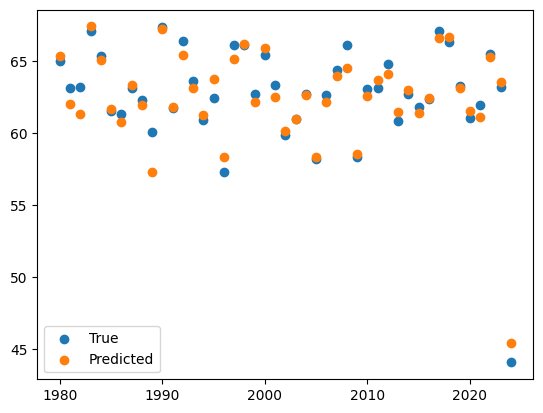

In [231]:
from sklearn.metrics import mean_squared_error
y_pred = result.predict(X_test)
print(f"Error: {round(mean_squared_error(y_test, y_pred), 3)}")
years = X_test.index.year
valid_years = years.value_counts().index
plt.scatter(valid_years, y_test.groupby(years).mean(), label="True")
plt.scatter(valid_years, y_pred.groupby(years).mean(), label="Predicted")
plt.legend()

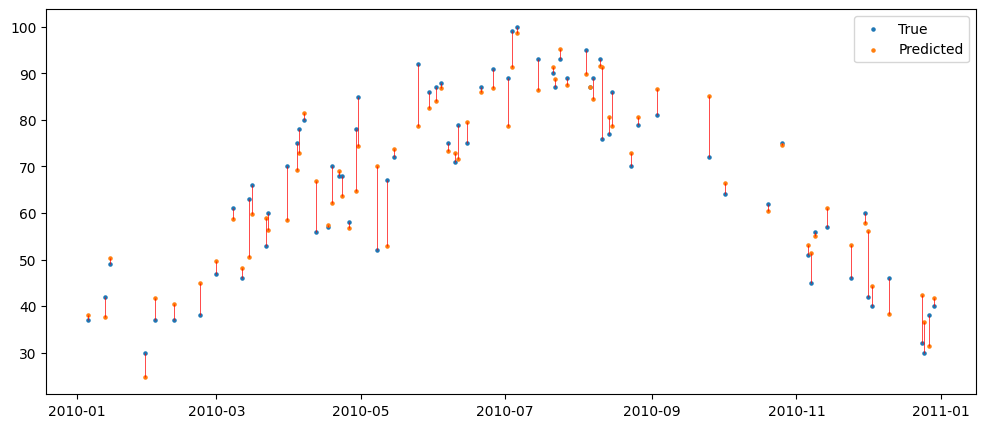

In [232]:
ind = y_pred[y_pred.index.year == 2010].index
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(ind, y_test[ind], s=5, label="True")
ax.scatter(ind, y_pred[ind], s=5, label="Predicted")
ax.legend()
combined = pd.concat([y_pred[ind], y_test[ind]], axis=1)
_ = ax.vlines(ind, ymin=combined.min(axis=1), ymax=combined.max(axis=1), colors="r", lw=0.5)

LSTM

In [233]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
data = data.loc[:, data.columns != "target"]
scaled_data = scaler.fit_transform(data)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][1]  # 'TMAX' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (12906, 10, 3)
Train Y shape: (12906,)
Test X shape: (3227, 10, 3)
Test Y shape: (3227,)


In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [235]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 128)               67584     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 67713 (264.50 KB)
Trainable params: 67713 (264.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [236]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [237]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('./best_model_weights.h5', monitor='val_loss', save_best_only=True)


history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

# load model
# model = tf.keras.models.load_model('./best_model_weights.h5')

Epoch 1/100


162/162 [==============================] - 3s 11ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 2/100
 16/162 [=>............................] - ETA: 1s - loss: 0.0093

/home/efim-sokolov/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/162 [==============================] - 1s 8ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 3/100
162/162 [==============================] - 1s 8ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 4/100
162/162 [==============================] - 1s 8ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 5/100
162/162 [==============================] - 1s 9ms/step - loss: 0.0071 - val_loss: 0.0059
Epoch 6/100
162/162 [==============================] - 1s 9ms/step - loss: 0.0067 - val_loss: 0.0055
Epoch 7/100
162/162 [==============================] - 1s 8ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 8/100
162/162 [==============================] - 1s 8ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 9/100
162/162 [==============================] - 1s 9ms/step - loss: 0.0061 - val_loss: 0.0049
Epoch 10/100
162/162 [==============================] - 1s 8ms/step - loss: 0.0060 - val_loss: 0.0048
Epoch 11/100
162/162 [==============================] - 1s 8ms/step - loss: 0.0059 - val_loss: 0.0049


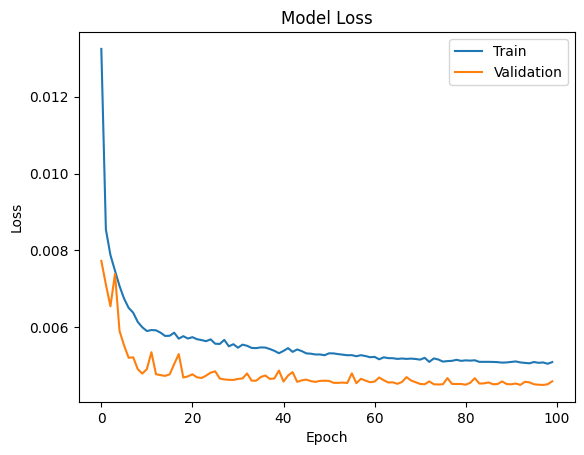

In [238]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [239]:
y_pred = model.predict(test_x)

101/101 [==============================] - 1s 4ms/step


In [240]:
pred = sm.add_constant(y_pred)
pred = sm.add_constant(pred, prepend=False, has_constant="add")
pred = scaler.inverse_transform(pred)[:, 1]

In [241]:
true = sm.add_constant(test_y)
true = sm.add_constant(true, prepend=False, has_constant="add")
true = scaler.inverse_transform(true)[:, 1]

In [242]:
mean_squared_error(true, pred)

44.56857845945909

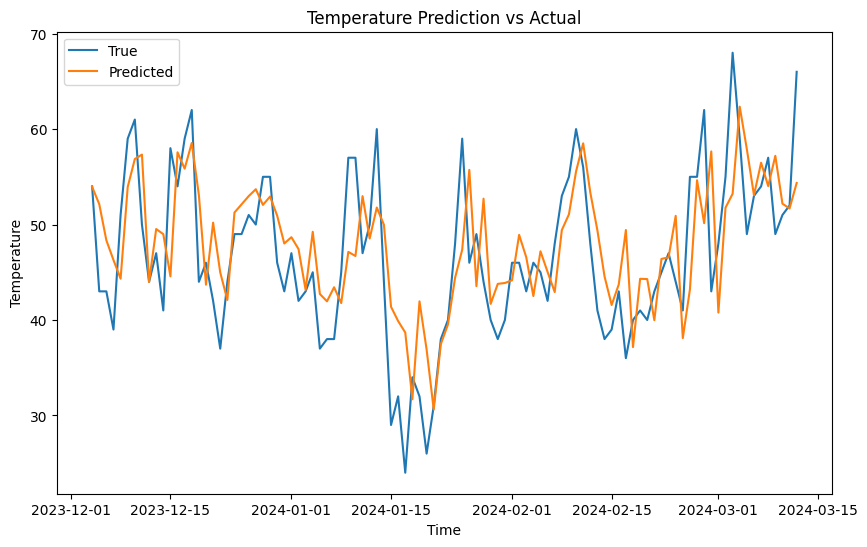

In [243]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(data.index[-100:], true[-100:], label='True')
plt.plot(data.index[-100:], pred[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
     